In [159]:
# Package unpackged
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools

In [160]:
# Data imported
data=pd.read_csv("BetaExample.txt",sep="|")
data=data.dropna(how='any')
data.DATE=pd.to_datetime(data.DATE)

In [161]:
# Learn and test data separated
learnData=data.loc[data['DATE']<='2014-12-31']
testData=data.loc[(data['DATE']>='2015-01-01') & (data['DATE']<='2015-12-31')]

In [162]:
# Beta calculated
tickers=data['TICKER'].unique()
regs=[]

for t in tickers:
    learnTickerData=learnData.loc[learnData['TICKER']==t]
    reg=LinearRegression(fit_intercept=False)
    X=np.c_[learnTickerData['RM']]
    y=list(learnTickerData['R'])
    reg.fit(X, y)
    regs.append(reg)
    
    print(t,float(reg.coef_))

IBM 0.9067383815134795
AAPL 1.1363004700195205
TSLA 1.3100847134478366


In [163]:
# Holding solved
betas=[float(r.coef_) for r in regs]
unit=[0,1,0]
ones=[1,1,1]

M=np.array([betas,unit,ones])
b=np.array([0,1,0])
holdings=np.linalg.solve(M,b)

for t,h in zip(tickers,holdings):
    print(t,h)

IBM -0.430856139425
AAPL 1.0
TSLA -0.569143860575


In [164]:
# Returns and cumulative sum returns for portfolio and market calculated
period=testData['DATE'].unique()
returns=[]
marketReturns=[]

for p in period:
    dayData=testData.loc[testData['DATE']==p]
    dayReturns=[float(dayData.loc[dayData['TICKER']==t]['R']) for t in tickers]
    returns.append(np.dot(holdings,dayReturns))
    marketReturns.append(float(dayData.loc[dayData['TICKER']=='IBM']['RM']))
    
accReturns=list(itertools.accumulate(returns))
accMarketReturns=list(itertools.accumulate(marketReturns))

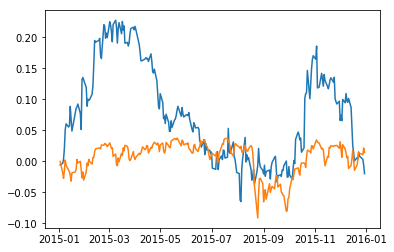

In [165]:
# Cumulative sum returns plotted
plt.plot(period,accReturns,period,accMarketReturns)
plt.show()

In [166]:
np.corrcoef(returns,marketReturns)

array([[ 1.        ,  0.02919532],
       [ 0.02919532,  1.        ]])